## HW 9. Introduction to algorithms

This is ninth Homework for CS 566. This problem was given in lecture.

## Task 1. Solve the problem "MinCost Climbing Stairs" from https://leetcode.com/problems/min-cost-climbing-stairs/description/ using Python3.

Use the box below, to paste the working code. The format of the code should be identical to LeetCode platform. (4 points)

In [9]:
from typing import List
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        d1, d2 = 0,0
        for i in range(len(cost)):
            temp = cost[i] + min(d1,d2)
            d2 = d1
            d1 = temp
        return min(d1,d2)

### Do not modify the testing code below. If you get message "Mistake in test case #", it means that you algorithm is incorrect.

In [10]:
#test_case_1
nums = [10, 15, 20]
expected = 15
actual = Solution().minCostClimbingStairs(nums)
assert actual==expected, "Mistake in test case 1"
print("OK")

OK


### Write analysis of the Memory Complexity and Time Complexity using Aymptotic Notation O. (1 point)

Memory Analysis: O(1)

Time Analysis: O(n)

## Task 2. Solve the problem "Longest Palyndromic Subsequence" from https://leetcode.com/problems/longest-palindromic-subsequence/description/ using Python3.

Use the box below, to paste the working code. The format of the code should be identical to LeetCode platform. (4 points)

In [11]:
class Solution:
    def longestPalindromeSubseq(self, s: str) -> int:
        # bottom up
        n = len(s)
        dp = [[0] * n for i in range(n)]
        for i in range(n - 1, -1, -1):
            dp[i][i] = 1
            for j in range(i+1, n):
                if s[i] == s[j]:
                    dp[i][j] = dp[i + 1][j - 1] + 2
                else:
                    dp[i][j] = max(dp[i + 1][j], dp[i][j - 1])

        return dp[0][n - 1]

In [12]:
#test_case_1
s = "bbbab"
expected = 4
actual = Solution().longestPalindromeSubseq(s)
assert actual==expected, "Mistake in test case 1"
print('OK')

OK


### Write analysis of the Memory Complexity and Time Complexity using Asymptotic Notation O. (1 point)

Memory Analysis: O(n^2)

Time Analysis: O(n^2)


### Task 3. Theoretical Question (5 points)

As we have seen on the lecture about Amortized Analysis, the total cost for Table-Insert is $\leq 3*n$.

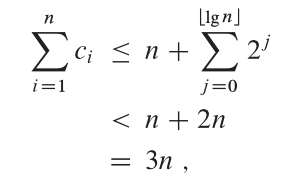

Your task is to proove that: $$\sum_{j=0}^{lgn} 2^j ≤ 2*n$$

Hint: use school math

#### My Answer

Start with by calculating the left-hand side:

$\sum_{j=0}^{k} 2^j$

which is a geometric series:

$= \frac{1(2^{k+1} - 1)}{2 - 1} = 2^{k+1} - 1.$

For $( k = \log n )$, this becomes:

$\sum_{j=0}^{\log n} 2^j$

$= 2^{\log n + 1} - 1$

$= 2 \cdot 2^{\log n} - 1$

$= 2n - 1.$

Since:

$2n - 1 \leq 2n.$

Thus, we conclude that:

$\sum_{j=0}^{\log n} 2^j \leq 2n.$

### Task 4. Theoretical Question. (5 points)

In standard Python `List` the reallocation is done with formula $$\text{new_capacity} = \text{current_capacity} * 2$$

 This leads to O(1) amortized cost on operation insert (proven on lecture with accounting method).

Let's suppose we created new programming language where the reallocation is done via different formula, and we want to analyze it.

Find the amortized cost on operation insert if reallocation formula becomes "fibbonachi reallocation" where instead of factor $2$ we use golden ratio:
$$\text{new_capacity} = \text{current_capacity} * \phi$$
$$\phi = \frac{1 + \sqrt5}{2}$$


You need to no just find amortized cost on insert operation, but also proove it like we did on the lecture.

P.S. Once you find the answer, you will be able to understand better how Java, for example, behaves during reallocation. The formula for reallocation for Java `ArrayList` (Python equivalent for `List`) is:

$$\text{new_capacity} = \text{current_capacity} * 1.5$$

#### My Answer

Using accounting method, where $C$ is current capacity, $n$ is current array size, and $\phi$ is golden ratio:

**Cost Assignment**:
   - **Inserting Without Resizing**:
     - Actual Cost: $ O(1) $.
     - Amortized Cost: Assign $2$ credits per insertion, leaving $ 1 $ credit after the operation.
   - **Inserting With Resizing**:
     - Total Actual Cost: $ O(n) $ (for copying $ n $ elements and inserting).
     - Accumulated credits before resizing: $ 2n $ (from previous insertions).

**Credit Usage During Resizing**:
   - When resizing, we can cover the $ O(n) $ cost using the $ 2n $ credits accumulated from earlier operations.
   - The amortized cost during resizing remains balanced:

   Amortized Cost $= Actual Cost - Credits Used = O(n) - O(n) = O(1)$.

So since regular insertions and resizing insertions amortized cost is $O(1)$ the total amortized cost is $O(1)$


